# población campesina víctima y población campesina nacional
## Informe 
Creado por ivan gabriel corredor
12_06_2024

In [5]:
import numpy as np
import pandas as pd

In [6]:
coding: "latin-1"

In [7]:
#pd.options.display.max_info_rows= 50
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#pd.options.display.max_colwidth = 300

## Cargue

In [9]:
## ruta entrada
p1 = "E:/GEIH/salidas/"
## ruta salida
p2 = "E:/GEIH/salidas/informes/"

In [7]:
# cargue base 2022
df_vic = pd.read_csv(p1 + "geih_vic_22.csv", sep = ";", decimal=",", low_memory=False)

## Procesamiento

In [487]:
# asignar formato correcto a las variables
names = ['CAMPESINA', 'P2059', 'ES_VICTIMA', 'FEX_C_VIV', 'ES_DESPLAZADO', 'FEX_C18', 
         'PET', 'FT_x', 'FFT_x', 'FFT_y', 'FT_y', 'OCI', 'DSI', 'P6920', 'P1519']
for i in names:
    df_vic[i] = pd.to_numeric(df_vic[i], errors='coerce')

In [10]:
df_vic['CAMPESINA'].value_counts()

CAMPESINA
0    738952
1    172923
9      7584
Name: count, dtype: int64

In [11]:
# renombrar variables
df_vic.rename(columns = {"P3271":"SEXO", "P6040":"EDAD", "P6080":"ETNIA"}, 
              inplace = True)

# Cálculo de variables

### Campensina

In [18]:
# crear variable campesina
def camp(df):
    if df["CAMPESINA"]==1:
        x = 1
    else:
        x= 0
    return(x)
df_vic["CAMPESINA_2"] = df_vic.apply(camp, axis = 1)

In [19]:
df_vic['CAMPESINA_2'].value_counts()

CAMPESINA_2
0    746536
1    172923
Name: count, dtype: int64

### No campesina

In [21]:
# crear variable no campesina
def ncamp(df):
    if df["CAMPESINA"]!=1:
        x = 1
    else:
        x= 0
    return(x)
df_vic["NO_CAMPESINA"] = df_vic.apply(ncamp, axis = 1)

### Fueron campesinos

In [23]:
# crear variable fueron campesinos
def fcamp(df):
    if df["P2059"]==1:
        x = 1
    else:
        x= 0
    return(x)
df_vic["FUERON_CAMPE"] = df_vic.apply(fcamp, axis = 1)

### Víctima

In [25]:
# rellenar valores nulos de la variable víctima
df_vic['ES_VICTIMA'] = df_vic['ES_VICTIMA'].fillna(0)

In [26]:
df_vic['ES_VICTIMA'].isna().sum()

0

In [27]:
# crear variable no VÍCTIMA
def nvic(df):
    if df["ES_VICTIMA"]!=1:
        x = 1
    else:
        x= 0
    return(x)
df_vic["NO_VICTIMA"] = df_vic.apply(nvic, axis = 1)

In [28]:
df_vic['NO_VICTIMA'].value_counts()

NO_VICTIMA
1    796190
0    123269
Name: count, dtype: int64

### Grupo etario

In [30]:
def rang_ed(df):
    if df["EDAD"]<=5:
        x = "Entre 0 y 5 años"
    elif (df["EDAD"]>5 and df["EDAD"]<=11):
        x = "Entre 6 y 11 años"
    elif (df["EDAD"]>11 and df["EDAD"]<=17):
        x = "Entre 12 y 17 años"
    elif (df["EDAD"]>17 and df["EDAD"]<=28):
        x = "Entre 18 y 28 años"
    elif (df["EDAD"]>28 and df["EDAD"]<=59):
        x = "Entre 29 y 59 años"
    else:
        x = "60 años o más"
    return x
                                                                                                                        
df_vic["GRUPO_ETARIO"] = df_vic.apply(rang_ed, axis = 1)

### Discapacidad

In [32]:
def disc(df):
    columns_to_check = ["P1906S1", "P1906S2", "P1906S3", "P1906S4",
                        "P1906S5", "P1906S6", "P1906S7", "P1906S8"]
    
    for col in columns_to_check:
        if df[col] in [1, 2]:
            return "Si"
    return "No"

df_vic["DISCAPACIDAD"] = df_vic.apply(disc, axis=1)

# the same function is this:
# def disc(df):
#     if df["P1906S1"] in [1,2]:
#         x = "Si"
#     elif df["P1906S2"] in [1,2]:
#         x = "Si"
#     elif df["P1906S3"] in [1,2]:
#         x = "Si"
#     elif df["P1906S4"] in [1,2]:
#         x = "Si"
#     elif df["P1906S5"] in [1,2]:
#         x = "Si"
#     elif df["P1906S6"] in [1,2]:
#         x = "Si"
#     elif df["P1906S7"] in [1,2]:
#         x = "Si"
#     elif df["P1906S8"] in [1,2]:
#         x = "Si"
#     else:
#         x = "No"
#     return x

In [33]:
df_vic["DISCAPACIDAD"].value_counts()

DISCAPACIDAD
No    873210
Si     46249
Name: count, dtype: int64

## Departamento

In [35]:
# departamento
print(len(list(df_vic["DPTO"].unique())))

33


In [36]:
df_vic["NOMBRE_DPTO"] = df_vic["DPTO"].replace([5, 8, 11, 13, 15, 17, 18, 19, 20, 23, 25, 27, 
                                                   41, 44, 47, 50, 52, 54, 63, 66, 68, 70, 73, 76,
                                                   81, 85, 86, 88, 91, 94, 95, 97, 99],
                                                   ["Antioquia", "Atlántico", "Bogotá", "Bolívar", "Boyacá",
                                                    "Caldas", "Caquetá", "Cauca", "Cesar", "Córdoba", "Cundinamarca",
                                                    "Chocó", "Huila", "La Guajira", "Magdalena", "Meta", "Nariño",
                                                    "Norte de Santander", "Quindio", "Risaralda", "Santander",
                                                    "Sucre", "Tolima", "Valle del Cauca", "Arauca", "Casanare",
                                                    "Putumayo", "Providencia y Santa Catalina", "Amazonas",
                                                    "Guainía", "Guaviare", "Vaupés", "Vichada"])

In [37]:
# names departamento
print(list(df_vic["NOMBRE_DPTO"].unique()))

['Atlántico', 'Bolívar', 'Cundinamarca', 'Caquetá', 'Boyacá', 'Valle del Cauca', 'Quindio', 'Risaralda', 'Antioquia', 'Bogotá', 'Caldas', 'Cauca', 'Cesar', 'Córdoba', 'Huila', 'La Guajira', 'Meta', 'Nariño', 'Norte de Santander', 'Santander', 'Sucre', 'Casanare', 'Putumayo', 'Guainía', 'Guaviare', 'Vaupés', 'Tolima', 'Arauca', 'Providencia y Santa Catalina', 'Chocó', 'Magdalena', 'Amazonas', 'Vichada']


In [38]:
# agregar ceros a la izquierda para completar el código
df_vic["DPTO"] = df_vic["DPTO"].astype(str).str.zfill(2)

## Ciudades capitales

In [40]:
print(list(df_vic["AREA"].unique()))

[nan, '5.0', '8.0', '11.0', '13.0', '15.0', '17.0', '18.0', '19.0', '20.0', '23.0', '41.0', '44.0', '50.0', '52.0', '54.0', '63.0', '66.0', '68.0', '70.0', '76.0', '73.0', '88.0', '27.0', '47.0']


In [41]:
df_vic["AREA"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 919459 entries, 0 to 919458
Series name: AREA
Non-Null Count   Dtype 
--------------   ----- 
627349 non-null  object
dtypes: object(1)
memory usage: 7.0+ MB


In [42]:
# ciudades capitales
df_vic["CIUDAD"] = pd.to_numeric(df_vic["AREA"], errors = 'coerce').replace([5, 8, 11, 13, 15,
                                           17, 18, 19, 20, 23,
                                           27, 41, 44, 47, 50, 
                                           52, 54, 63, 66, 68, 
                                           70, 73, 76, 88],
                                           ["Medellín AM", "Barranquilla AM", "Bogotá DC", "Cartagena", "Tunja",
                                            "Manizales AM", "Florencia", "Popayán", "Valledupar", "Montería",
                                            "Quibdó", "Neiva", "Riohacha", "Santa Marta", "Villavicencio",
                                            "Pasto", "Cúcuta AM", "Armenia", "Pereira", "Bucaramanga AM",
                                            "Sincelejo", "Ibagué", "Cali AM", "Providencia y Santa Catalina" 
                                            ])

In [43]:
print(list(df_vic["CIUDAD"].unique()))

[nan, 'Medellín AM', 'Barranquilla AM', 'Bogotá DC', 'Cartagena', 'Tunja', 'Manizales AM', 'Florencia', 'Popayán', 'Valledupar', 'Montería', 'Neiva', 'Riohacha', 'Villavicencio', 'Pasto', 'Cúcuta AM', 'Armenia', 'Pereira', 'Bucaramanga AM', 'Sincelejo', 'Cali AM', 'Ibagué', 'Providencia y Santa Catalina', 'Quibdó', 'Santa Marta']


In [44]:
# agregar código_DANE 
df_vic["COD_DANE"]= df_vic["CIUDAD"].replace(["Medellín AM", "Barranquilla AM", "Bogotá DC", "Cartagena", "Tunja",
                                            "Manizales AM", "Florencia", "Popayán", "Valledupar", "Montería",
                                            "Quibdó", "Neiva", "Riohacha", "Santa Marta", "Villavicencio",
                                            "Pasto", "Cúcuta AM", "Armenia", "Pereira", "Bucaramanga AM",
                                            "Sincelejo", "Ibagué", "Cali AM", "Providencia y Santa Catalina" 
                                            ],
                                             [ 5001, 8001, 11001, 13001, 15001,
                                              17001, 18001, 19001, 20001, 23001,
                                              27001, 41001, 44001, 47001, 50001,
                                              52001, 54001, 63001, 66001,  68001,
                                              70001, 73001, 76001, 88001
                                             ])

In [45]:
print(list(df_vic["COD_DANE"].unique()))

[nan, 5001.0, 8001.0, 11001.0, 13001.0, 15001.0, 17001.0, 18001.0, 19001.0, 20001.0, 23001.0, 41001.0, 44001.0, 50001.0, 52001.0, 54001.0, 63001.0, 66001.0, 68001.0, 70001.0, 76001.0, 73001.0, 88001.0, 27001.0, 47001.0]


In [46]:
df_vic["COD_DANE"] = pd.to_numeric(df_vic["COD_DANE"], downcast='integer', errors= 'coerce').astype(pd.Int32Dtype())

In [47]:
# agregar ceros a la izquierda para completar el código
#df_vic["COD_DANE"] = pd.to_numeric(df_vic["COD_DANE"], errors= 'coerce').astype(str).str.zfill(5)
df_vic["COD_DANE"] = df_vic["COD_DANE"].apply(lambda x: str(int(x)).zfill(5) if pd.notnull(x) else x)

In [48]:
print(list(df_vic["COD_DANE"].unique()))

[<NA>, '05001', '08001', '11001', '13001', '15001', '17001', '18001', '19001', '20001', '23001', '41001', '44001', '50001', '52001', '54001', '63001', '66001', '68001', '70001', '76001', '73001', '88001', '27001', '47001']


## Vivienda

In [50]:
## descripción variables:
# CLASE: 1 urbano, 2 rural
# Hogar: posición del hogar en la vivienda
# P4000: tipo de vivienda, se exlucye la Vivienda indígena op (5)
# P4010: material de las paredes exteriores
# P4020: material de los pisos
# P4030: servicios con que cuenta la vivienda
# P4030S1: energía eléctrica
# P4030S3: alcantarillado
# P4030S4: recoelcción de basura
# P4030S5: servicios con que cuenta la vivienda, acueducto
# P5020: servicio sanitario del hogar
# P5050: de donde obtiene el hogar el agua para consumo humano
# P5070: lugar donde el hogar prepara alimentos
# P70: No. hogares en la vivienda
# P6008: total de personas en el hogar
# P5000: total de cuartos que dispone el hogar
# P5010: No. cuartos usados por el hogar para dormir

### Componentes cuanti

In [403]:
### Estructura – Tipo de vivienda
# op 6: Otra vivienda (carpa, vagón, embarcación, cueva, refugio natural, etc.)
df_vic["TIPO_VIVIENDA"] = (df_vic["P4000"] == 6).astype(int)

### Material paredes exteriores
df_vic["MATERIAL_PAREDES"] = ((df_vic["P4010"].isin([5, 7, 8, 9])) & (df_vic["P4000"]!=5)).astype(int)

### Cohabitación

# Se consideran en déficit los hogares que habitan en una vivienda en la que
# hay tres o más hogares.

# En cabeceras y centros poblados:
# hay más de 6 personas en total en la vivienda. 

# En los dos casos, no se consideran los hogares principales y unipersonales

group_sizes = df_vic.groupby("DIRECTORIO").size()

def coha(row, group_sizes):
    if  row["P4000"]!=5 and row["P70"] >= 3 and row["HOGAR"]!= 1 and row["P6008"]!= 1:
        return 1
    elif row["P4000"]!=5 and row["P70"] == 2 and row["CLASE"] == 1 and group_sizes[row["DIRECTORIO"]] > 6 and row["HOGAR"] != 1 and row["P6008"]!= 1:
        return 1
    else:
        return 0
# lambda actua para que apply solo reciba un argumento, pero coha recibe dos dataframes, el completo y el agrupado
df_vic["COHABITACION"] = df_vic.apply(lambda row: coha(row, group_sizes), axis=1)

### Hacinamiento no mitigable
# personas por cuarto
df_vic["PER_CUARTO"] = df_vic["P6008"] / df_vic["P5010"]

df_vic["HACI_NO_MITI"] = ((df_vic["CLASE"] == 1) & (df_vic["PER_CUARTO"] > 4)  & (df_vic["P4000"]!=5)).astype(int)
# Se ajusta a la zona rural, hogares con más de cuatro personas por cuarto para dormir.
#df_vic["HACI_NO_MITI"] = df_vic.apply(lambda x: 1 if x["CLASE"]==2 and (x["ORDEN"] / x["P5010"])>4 else 0, axis=1)  

### Déficit Cuantitativo

In [405]:
df_vic["DEF_CUANTI"] = ((df_vic["TIPO_VIVIENDA"]== 1) |
                        (df_vic["MATERIAL_PAREDES"]== 1) | 
                        (df_vic["COHABITACION"]== 1) | 
                        (df_vic["HACI_NO_MITI"]== 1)).astype(int)

In [55]:
df_vic["DEF_CUANTI"].value_counts()

DEF_CUANTI
0    846837
1     72622
Name: count, dtype: int64

In [56]:
df_vic[df_vic["DIRECTORIO"]==5001031][["DIRECTORIO","HOGAR","CLASE",  "P70",
                                       "P6008", "P5000", "P5010", "COHABITACION"]]

,DIRECTORIO,HOGAR,CLASE,P70,P6008,P5000,P5010,COHABITACION
2460,5001031,1,1,2,5,4,3,0
2461,5001031,1,1,2,5,4,3,0
2462,5001031,1,1,2,5,4,3,0
2463,5001031,1,1,2,5,4,3,0
2464,5001031,1,1,2,5,4,3,0
2465,5001031,2,1,2,4,4,3,1
2466,5001031,2,1,2,4,4,3,1
2467,5001031,2,1,2,4,4,3,1
2468,5001031,2,1,2,4,4,3,1


### Componentes cuali

In [58]:
### Hacinamiento mitigable
condicion1 = ((df_vic["CLASE"] == 1) & 
              ## para variables discretas usar between
              #(df_vic["PER_CUARTO"].between(3, 4, inclusive="both")) &
              ((df_vic["PER_CUARTO"]>2) & (df_vic["PER_CUARTO"]<=4)) & 
              (df_vic["P4000"]!=5))

condition2 = ((df_vic["CLASE"] == 2) &
              (df_vic["P4000"]!=5) &
              (df_vic["PER_CUARTO"] > 2))

df_vic["HACI_MITI"] = (condicion1 | condition2).astype(int)

### Material de los pisos
df_vic["MAT_PISOS"] = ((df_vic["P4000"]!=5) & (df_vic["P4020"]==1)).astype(int)

### Cocina
con_coci1 = ((df_vic["CLASE"] == 1) & 
              (df_vic["P5070"].isin([2, 4, 5])) &
              (df_vic["P4000"]!=5))
con_coci2 = ((df_vic["CLASE"] == 2) & 
              (df_vic["P5070"].isin([2, 4])) &
              (df_vic["P4000"]!=5))
df_vic["COCINA"] = (con_coci1 | con_coci2).astype(int)

### Acueducto
con_acue1 = ((df_vic["CLASE"] == 1) & 
              (df_vic["P4030S5"]==2) &
              (df_vic["P4000"]!=5))
con_acue2 = ((df_vic["CLASE"] == 2) & 
              (df_vic["P5050"].isin([4,5,6,8,9,10])) &
              (df_vic["P4000"]!=5))
df_vic["ACUEDUCTO"] = (con_acue1 | con_acue2).astype(int)

# Alcantarillado
con_alca1 = ((df_vic["CLASE"] == 1) & 
              (df_vic["P4030S3"]==2) &
              (df_vic["P4000"]!=5))

con_alca2 = ((df_vic["CLASE"] == 1) & 
              (df_vic["P4030S3"]==1) &
             (df_vic["P5020"].isin([2,3,4,5,6])) &
              (df_vic["P4000"]!=5))

con_alca3 = ((df_vic["CLASE"] == 2) & 
              (df_vic["P5020"].isin([3,4,5,6])) &
              (df_vic["P4000"]!=5))
df_vic["ALCANTARILLADO"] = (con_alca1 | con_alca2 | con_alca3).astype(int)

### Energía
df_vic["ENERGIA"] = ((df_vic["P4000"]!=5)  & 
                     (df_vic["P4030S1"]==2)).astype(int)

## Recolección de basuras
df_vic["BASURAS"] = ((df_vic["P4000"]!=5) & 
                     (df_vic["CLASE"] == 1) &
                     (df_vic["P4030S4"]==2)).astype(int)

### Déficit Cualitativo

In [60]:
df_vic["DEF_CUALI"] = ((df_vic["HACI_MITI"]== 1) |
                        (df_vic["MAT_PISOS"]== 1) | 
                        (df_vic["COCINA"]== 1) | 
                        (df_vic["ACUEDUCTO"]== 1) |
                        (df_vic["ALCANTARILLADO"]== 1) |
                        (df_vic["ENERGIA"]== 1) |
                        (df_vic["BASURAS"]== 1) ).astype(int)
# reemplazar los valores del deficit cualitativo en los hogares con doble déficit
df_vic.loc[(df_vic["DEF_CUALI"] == 1) & (df_vic["DEF_CUANTI"] == 1), "DEF_CUALI"] = 0

### Déficit habitacional

In [62]:
def df_hab(row):
    if row["DEF_CUANTI"]==1 and row["DEF_CUALI"]==0:
        x = 1
    elif row["DEF_CUANTI"]==0 and row["DEF_CUALI"]== 1:
        x = 1
    else:
        x = 0
    return x

df_vic["DEF_HABITACIONAL"] = df_vic.apply(df_hab, axis=1)

In [63]:
df_vic["DEF_CUALI"].value_counts()

DEF_CUALI
0    658810
1    260649
Name: count, dtype: int64

In [64]:
df_vic["DEF_CUANTI"].value_counts()

DEF_CUANTI
0    846837
1     72622
Name: count, dtype: int64

In [65]:
df_vic["DEF_HABITACIONAL"].value_counts() 
# comp1: 333271 continuas
# comp1: 282206 discretas

DEF_HABITACIONAL
0    586188
1    333271
Name: count, dtype: int64

## pensión

In [489]:
df_vic["PENSIONADO"] = ((df_vic["P6920"] == 3) | (df_vic["P1519"] == 3)).astype(int)

In [5]:
df_vic["PENSIONADO"].value_counts() 

NameError: name 'df_vic' is not defined

In [ ]:
# concatenar variables de identificación
df_vic["ID_PER"] = df_vic[['DIRECTORIO', 'SECUENCIA_P', 'ORDEN']].apply(lambda row: f"{row['DIRECTORIO']}_{row['SECUENCIA_P']}_{row['ORDEN']}", axis=1)

## Exportar tabla con variables calculadas

In [67]:
# se exporta otra base con las variables calculadas para correr modelos 
#df_vic.to_csv(p1 + "geih_vic_22_b.csv", sep = ";", decimal=",")

In [68]:
df_vic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919459 entries, 0 to 919458
Data columns (total 385 columns):
 #    Column            Dtype  
---   ------            -----  
 0    DIRECTORIO        int64  
 1    SECUENCIA_P       int64  
 2    ORDEN             int64  
 3    P6016             int64  
 4    SEXO              int64  
 5    P6030S1           object 
 6    P6030S3           object 
 7    EDAD              int64  
 8    P6050             int64  
 9    P6083             int64  
 10   P6083S1           object 
 11   P6081             int64  
 12   P6081S1           object 
 13   P2057             int64  
 14   P2059             float64
 15   P2061             int64  
 16   ETNIA             int64  
 17   P6080S1           object 
 18   P6080S1A1         float64
 19   P6070             object 
 20   P6071             object 
 21   P6071S1           object 
 22   P3147S1           object 
 23   P3147S2           object 
 24   P3147S3           object 
 25   P3147S4           

# Resultados

In [14]:
# importar base para procesada 
df_vic = pd.read_csv(p1 + "geih_vic_22_b.csv", sep = ";", decimal=",")

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_3632\3338870918.py:2: DtypeWarning: Columns (32,34,59,79,80,81,87,89,97,98,99,100,101,102,106,119,132,134,136,138,139,147,148,150,151,153,154,162,164,170,176,177,178,188,190,196,199,202,204,215,219,220,221,222,223,258,259,271,272,273,280,281,282,283,284,285,286,287,288,289,290,291,308,314,317,339,344,346,348,351,353,354,357,358,369) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vic = pd.read_csv(p1 + "geih_vic_22_b.csv", sep = ";", decimal=",")


## General

In [117]:
df_vic[(df_vic['DIRECTORIO']==7309045) & (df_vic['SECUENCIA_P']==1) & (df_vic['ORDEN']==6)][['CAMPESINA_2', 'ES_VICTIMA', 'FEX_C_VIV', 'FEX_C18']]

,CAMPESINA_2,ES_VICTIMA,FEX_C_VIV,FEX_C18
919439,0,1.00,23.46,216.59


In [118]:
((df_vic["CAMPESINA_2"] * df_vic['FEX_C18']).sum()/12) / (df_vic['FEX_C18'].sum()/12) *100

29.48146718807391

In [119]:
(df_vic['FEX_C18'].sum()/12)

50495179.41666862

In [52]:
## agrupar los datos para sacar tabla y gráfica
total = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # total nacional
        'total': round((x['FEX_C18']).sum()/12, 3)})
).reset_index()

vt = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        'vic_hechos': round((x['FEX_C_VIV']).sum(), 3)})
).reset_index()

vt_des = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        'desplazados': round((x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum(), 3)})
).reset_index()

camp_vt = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
        'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
).reset_index()

camp_d = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # vic des
        '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
        'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
    })
).reset_index()

camp_nv = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # camp no vic
        '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
        'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
    })
).reset_index()

camp_nal = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # camp nal
        '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
    })
).reset_index()

from functools import reduce
# List of DataFrames to merge
frames_s = [total, vt, vt_des, camp_vt, camp_d, camp_nv, camp_nal]

# Use reduce to iteratively merge the DataFrames
campg = reduce(lambda left, right: pd.merge(left, right, on=["PER"]), frames_s)
campg

,PER,total,vic_hechos_x,vic_hechos_y,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,2022,50495179.42,8219191.08,7587348.08,50.80,4176086.96,51.50,3906834.42,26.40,11690949.83,29.50,14886719.75


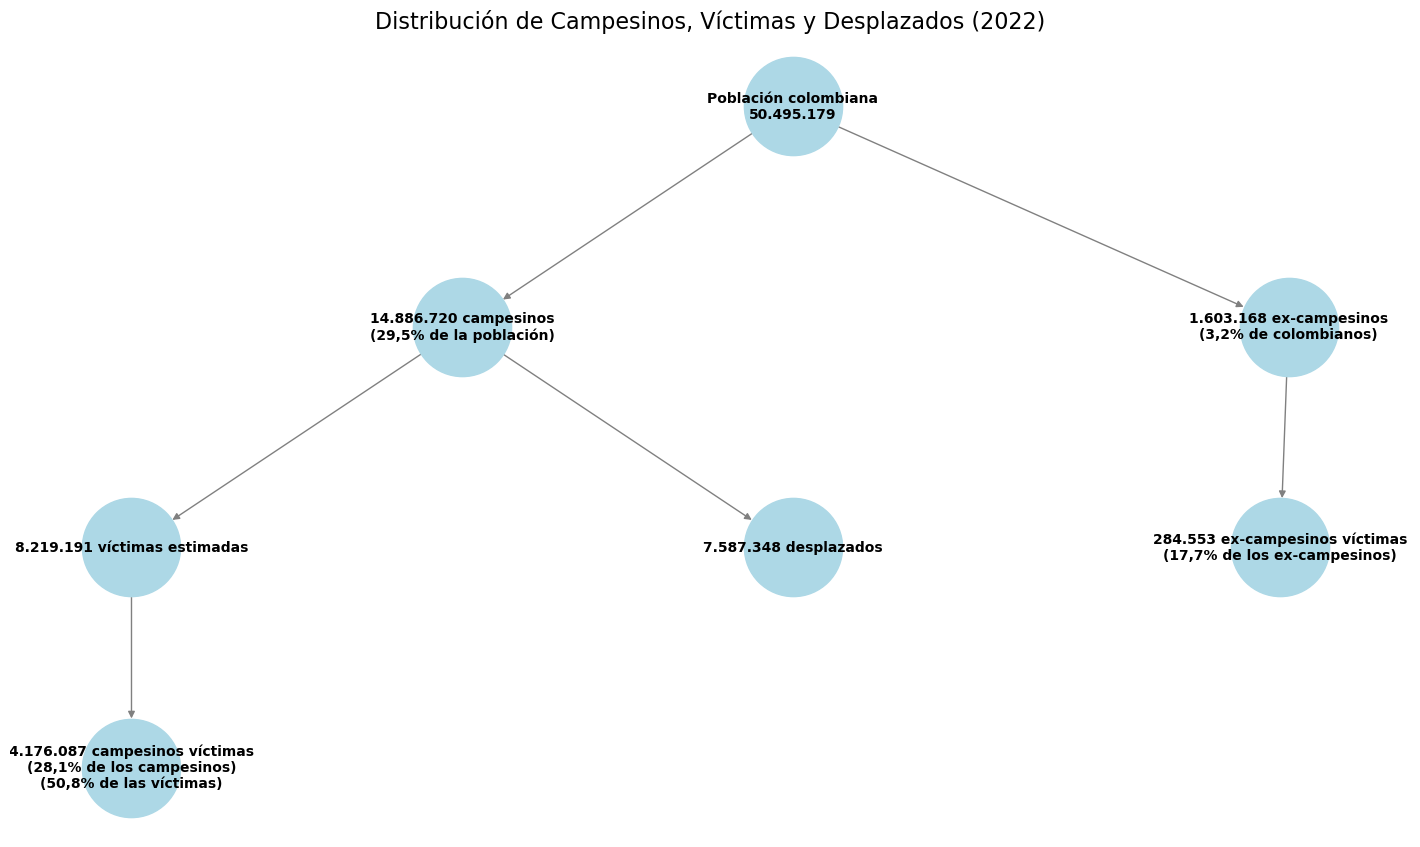

In [104]:
# Crear un grafo actualizado para el mapa conceptual con las nuevas modificaciones
import matplotlib.pyplot as plt
import networkx as nx
G_updated = nx.DiGraph()

# Agregar nodos con la información clave actualizada
G_updated.add_node("Población colombiana\n50.495.179", pos=(-1, 4))
G_updated.add_node("14.886.720 campesinos\n(29,5% de la población)", pos=(-3, 3))
G_updated.add_node("1.603.168 ex-campesinos\n(3,2% de colombianos)", pos=(2, 3))
G_updated.add_node("284.553 ex-campesinos víctimas\n(17,7% de los ex-campesinos)", pos=(1.95, 2))
G_updated.add_node("8.219.191 víctimas estimadas", pos=(-5, 2))
G_updated.add_node("7.587.348 desplazados", pos=(-1, 2))
G_updated.add_node("4.176.087 campesinos víctimas\n(28,1% de los campesinos)\n(50,8% de las víctimas)", pos=(-5, 1))

# Agregar aristas (relaciones entre los nodos actualizados)
G_updated.add_edges_from([
    ("Población colombiana\n50.495.179", "14.886.720 campesinos\n(29,5% de la población)"),
    ("Población colombiana\n50.495.179", "1.603.168 ex-campesinos\n(3,2% de colombianos)"),
    ("1.603.168 ex-campesinos\n(3,2% de colombianos)", "284.553 ex-campesinos víctimas\n(17,7% de los ex-campesinos)"),
    ("14.886.720 campesinos\n(29,5% de la población)", "8.219.191 víctimas estimadas"),
    ("14.886.720 campesinos\n(29,5% de la población)", "7.587.348 desplazados"),
    ("8.219.191 víctimas estimadas", "4.176.087 campesinos víctimas\n(28,1% de los campesinos)\n(50,8% de las víctimas)")
])

# Posicionar los nodos
pos_updated = nx.get_node_attributes(G_updated, 'pos')

# Dibujar el grafo actualizado
plt.figure(figsize=(14, 8))
nx.draw(G_updated, pos_updated, with_labels=True, node_size=5000, node_color="lightblue", 
        font_size=10, font_color="black", font_weight="bold", edge_color="gray")
plt.title("Distribución de Campesinos, Víctimas y Desplazados (2022)", fontsize=16)
plt.savefig(p1+ "mapa_conceptual.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

### Muestrales

In [40]:
###
# concatenar variables de identificación
df_vic["ID_PER"] = df_vic[['DIRECTORIO', 'SECUENCIA_P', 'ORDEN']].apply(lambda row: f"{row['DIRECTORIO']}_{row['SECUENCIA_P']}_{row['ORDEN']}", axis=1)


muestra1 = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        'víctimas': round(((x["ES_VICTIMA"]).sum()), 3),
        'desplazados': round(((x["ES_DESPLAZADO"]).sum()), 3),
        'no víctimas': round(((x["NO_VICTIMA"]).sum()), 3),
        'pob_nacional': round(((x["ID_PER"]).size), 3),
        'campesinos_nacional': round(((x["CAMPESINA_2"]).sum()), 3),
        'campesinos_víctimas': round(((x["CAMPESINA_2"] * x["ES_VICTIMA"]).sum()), 3)
        #'%_nal': round(((x["CAMPESINA_2"]).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        
    })
).reset_index()
muestra1

,PER,víctimas,desplazados,no víctimas,pob_nacional,campesinos_nacional,campesinos_víctimas
0,2022,123269.00,115252.00,796190.00,919459.00,172923.00,38476.00


In [42]:
df_vic["ID_PER"].duplicated().sum()

0

In [38]:
123269+796190

919459

## Sexo, Etario, Discapacidad, Etnia

In [124]:
# lista de variables
l_var_enf = ["SEXO", "GRUPO_ETARIO", "DISCAPACIDAD", "ETNIA"]
tab_out1_enf = ["sex", "eta", "disca", "etnia"]

for i, j in zip(l_var_enf, tab_out1_enf): 
    # víctimas todos los hechos
    df1 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
            'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_enf = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_enf.copy()")
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on=[i]), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")
    # objetos de salida: sexg, etag, discag, etniag

## Territorial

### Zona Geográfica

In [127]:
## agrupar los datos para sacar tabla y gráfica
clas_vt = df_vic.groupby(["PER", "CLASE"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
        'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
).reset_index()

clas_d = df_vic.groupby(["PER", "CLASE"]).apply(
    lambda x: pd.Series({
        # vic des
        '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
        'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
    })
).reset_index()

clas_nv = df_vic.groupby(["PER", "CLASE"]).apply(
    lambda x: pd.Series({
        # clas no vic
        '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
        'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
    })
).reset_index()

clas_nal = df_vic.groupby(["PER", "CLASE"]).apply(
    lambda x: pd.Series({
        # clas nal
        '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
    })
).reset_index()

from functools import reduce
# List of DataFrames to merge
frames_clas = [clas_vt, clas_d, clas_nv, clas_nal]

# Use reduce to iteratively merge the DataFrames
clasg = reduce(lambda left, right: pd.merge(left, right, on=["PER", "CLASE"]), frames_clas)
clasg

,PER,CLASE,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,2022,1,27.40,1416005.36,27.80,1315221.50,11.90,4153526.89,13.50,5236539.61
1,2022,2,90.70,2760081.60,90.80,2591612.92,81.60,7537422.95,83.50,9650180.14


### Departamento

In [129]:
## agrupar los datos para sacar tabla y gráfica
dpto_vt = df_vic.groupby(["PER", "DPTO", "NOMBRE_DPTO"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
        'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
).reset_index()

dpto_d = df_vic.groupby(["PER", "DPTO", "NOMBRE_DPTO"]).apply(
    lambda x: pd.Series({
        # vic des
        '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
        'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
    })
).reset_index()

dpto_nv = df_vic.groupby(["PER", "DPTO", "NOMBRE_DPTO"]).apply(
    lambda x: pd.Series({
        # dpto no vic
        '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
        'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
    })
).reset_index()

dpto_nal = df_vic.groupby(["PER", "DPTO", "NOMBRE_DPTO"]).apply(
    lambda x: pd.Series({
        # dpto nal
        '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
    })
).reset_index()

from functools import reduce
# List of DataFrames to merge
frames_dpto = [dpto_vt, dpto_d, dpto_nv, dpto_nal]

# Use reduce to iteratively merge the DataFrames
dptog = reduce(lambda left, right: pd.merge(left, right, on=["PER", "DPTO", "NOMBRE_DPTO"]), frames_dpto)
dptog

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\4191239823.py:5: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\4191239823.py:12: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),


,PER,DPTO,NOMBRE_DPTO,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,2022,05,Antioquia,49.80,775458.17,51.50,714984.61,26.10,1467104.54,30.20,2059873.86
1,2022,08,Atlántico,14.10,26048.29,13.80,24302.17,9.90,261567.94,10.20,281497.35
2,2022,11,Bogotá,4.50,16572.32,4.60,15104.93,1.70,127714.48,1.80,140371.64
3,2022,13,Bolívar,67.80,282304.62,68.00,277933.33,34.80,659227.45,39.60,876125.29
4,2022,15,Boyacá,61.60,24266.03,59.40,20277.15,60.90,788983.07,61.00,807401.50
5,2022,17,Caldas,49.90,60846.11,50.90,55247.45,25.70,242643.83,27.90,289102.05
6,2022,18,Caquetá,56.50,113703.07,56.50,107129.70,53.00,140908.25,54.20,227967.32
7,2022,19,Cauca,63.30,258610.61,64.90,237807.19,49.50,575468.79,52.40,773114.09
8,2022,20,Cesar,46.10,177509.42,46.40,170308.79,31.10,327276.86,34.40,463381.58
9,2022,23,Córdoba,63.90,259182.64,64.30,249252.51,56.90,909780.80,58.00,1108544.59


### Ciudades

In [131]:
## agrupar los datos para sacar tabla y gráfica
ciud_vt = df_vic.groupby(["PER", "COD_DANE", "CIUDAD"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
        'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
).reset_index()

ciud_d = df_vic.groupby(["PER", "COD_DANE", "CIUDAD"]).apply(
    lambda x: pd.Series({
        # vic des
        '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
        'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
    })
).reset_index()

ciud_nv = df_vic.groupby(["PER", "COD_DANE", "CIUDAD"]).apply(
    lambda x: pd.Series({
        # ciud no vic
        '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
        'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
    })
).reset_index()

ciud_nal = df_vic.groupby(["PER", "COD_DANE", "CIUDAD"]).apply(
    lambda x: pd.Series({
        # ciud nal
        '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
    })
).reset_index()

from functools import reduce
# List of DataFrames to merge
frames_ciud = [ciud_vt, ciud_d, ciud_nv, ciud_nal]

# Use reduce to iteratively merge the DataFrames
ciudg = reduce(lambda left, right: pd.merge(left, right, on=["PER", "COD_DANE", "CIUDAD"]), frames_ciud)
ciudg

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2157776485.py:5: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2157776485.py:12: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),


,PER,COD_DANE,CIUDAD,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,2022,05001,Medellín AM,4.30,25776.86,4.20,21570.74,1.60,56358.50,1.90,75925.62
1,2022,08001,Barranquilla AM,4.30,5828.36,4.30,5534.01,1.70,31630.64,1.80,36095.90
2,2022,11001,Bogotá DC,4.20,15530.63,4.40,14204.81,1.50,110417.51,1.60,122282.14
3,2022,13001,Cartagena,3.40,1963.39,3.40,1910.79,0.80,7150.69,0.90,8657.80
4,2022,15001,Tunja,12.10,539.04,12.50,477.24,11.30,19272.45,11.30,19683.26
5,2022,17001,Manizales AM,4.70,1372.93,4.90,1297.66,2.20,10061.82,2.30,11113.29
6,2022,18001,Florencia,12.10,9052.77,12.10,8523.63,6.20,6130.78,8.40,13061.85
7,2022,19001,Popayán,10.20,5146.17,10.70,4816.05,4.20,9765.75,5.10,13703.98
8,2022,20001,Valledupar,3.40,3709.69,3.40,3428.81,1.90,7463.18,2.10,10299.43
9,2022,23001,Montería,7.30,6469.17,7.50,6274.82,3.20,10756.14,3.90,15720.60


# Educación

In [136]:
# lista de variables
l_var_edu = [ "P6160", "P6170", "P3041", "P3042", "P3043"]
tab_out1_edu = [ "leer_escribir", "asiste_edu", "institucion", "nivel_edu", "titulo_edu"]

for i, j in zip(l_var_edu, tab_out1_edu): 
    # víctimas todos los hechos
    df1 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
            'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_edu = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_edu.copy()")
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on=[i]), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")
    # objetos de salida: leer_escribirg, asiste_edug, instituciong, nivel_edug, titulo_edug

### Asistencia enfoque

In [138]:
# lista de variables
l_var_edu2 = ["P6170", "P6170", "P6170", "P6170", "P3043"] # asistencia
l_var_edu_enf = ["SEXO", "GRUPO_ETARIO", "ETNIA", "DISCAPACIDAD", 
                "SEXO"]
tab_out1_edu2 = ["asiste_edu_sex", "asiste_edu_eta", "asiste_edu_etni", 
                "asiste_edu_disc",  "titulo_edu_sex"]

for i, k, j in zip(l_var_edu2, l_var_edu_enf, tab_out1_edu2): 
    # víctimas todos los hechos
    df1 = df_vic.groupby([i,k]).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby([i,k]).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby([i,k]).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby([i,k]).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
            'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_edu2 = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_edu2.copy()")
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on=[i,k]), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")
    # objetos de salida: asiste_edu_sexg, asiste_edu_etag, asiste_edu_etnig, asiste_edu_discg, titulo_edu_sexg

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2215962857.py:13: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2215962857.py:22: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),


In [139]:
titulo_edu_sexg

,P3043,SEXO,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,1.0,1,51.10,70151.84,51.00,67726.80,27.60,176920.67,30.90,230735.59
1,1.0,2,47.90,72811.71,47.60,70227.77,27.00,167599.11,30.30,223450.29
2,10.0,1,0.00,0.00,0.00,0.00,1.90,515.70,1.80,515.70
3,10.0,2,100.00,10.96,100.00,10.96,2.80,398.29,2.90,406.72
4,2.0,1,41.60,343664.31,42.10,322100.53,20.40,1067435.74,22.70,1330463.51
5,2.0,2,39.10,432345.67,40.10,409220.48,20.10,1085698.95,22.70,1416849.86
6,3.0,1,26.40,15666.07,26.80,14714.35,15.30,68271.74,16.40,80263.92
7,3.0,2,23.80,20467.86,24.10,19413.47,16.20,73794.78,17.20,89474.45
8,4.0,1,37.90,1094.24,40.10,1094.24,32.70,3941.88,33.50,4783.65
9,4.0,2,41.80,3640.61,43.80,3167.49,20.70,10168.55,23.20,12939.67


# Mercado laboral

## Indicadores nacionales sin desagregar campesinos

In [144]:
# crear variable con indicador de tipo de población en cada categoria
def varout(df):
    if df["PET"]==1:
        x= "Población en edad de trabajar"
    elif df["FT_x"]==1:
        x= "Fuerza de trabajo"
    elif df["OCI"]==1:
        x= "Ocupados"
    elif df["DSI"]==1:
        x= "Desocupados"
    elif df["FFT_x"]==1:
        x= "Fuera de la fuerza de trabajo"
    elif df["PER"]==2022:
        x= "Población Total"
    else:
        x= np.nan
    return x

In [145]:
## los modulos del DANE traen las variables dummi de la estructura laboral
# lista de variables

l_var_n = ["PER", "PET", "FT_x", "OCI", "DSI", "FFT_x"]
tab_out1_n = ["per_n", "et_n", "ft_n", "oc_n", "des_n", "fft_n"]

for i, j in zip(l_var_n, tab_out1_n): 
    # víctimas todos los hechos
    df1 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / (( x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round((( x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
            'nal': round(((x["FEX_C18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_lab_n = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_lab_n.copy()")
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on=[i]), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")

In [146]:
## pegue de tablas de salida
pob_lab_ng = pd.concat([per_ng, et_ng, ft_ng, 
                        oc_ng, des_ng, fft_ng], axis=0).reset_index(drop=True)
pob_lab_ng["variable"]= pob_lab_ng.apply(varout, axis=1)

# borrar variables innecesarias
for i in l_var_n:
    pob_lab_ng.drop(columns=i, inplace=True)
# reordenar variables
pob_lab_ng = pob_lab_ng[['variable', '%_vic_hechos', 'vic_hechos', '%_des', 'des', '%_nv', 'no_vic', '%_nal',
       'nal']]

pob_lab_ng 

,variable,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,Población Total,100.00,8219191.08,92.30,7587348.08,87.60,44211764.02,100.00,50495179.42
1,Población en edad de trabajar,100.00,6687328.77,91.00,6086580.68,86.90,33889642.74,100.00,38996571.08
2,Fuerza de trabajo,100.00,4147019.71,91.30,3785027.05,87.20,21645893.25,100.00,24813515.96
3,Ocupados,100.00,3629397.61,91.00,3302690.71,87.40,19260550.67,100.00,22032179.97
4,Desocupados,100.00,517622.10,93.20,482336.34,85.80,2385342.58,100.00,2781335.98
5,Fuera de la fuerza de trabajo,100.00,2540309.06,90.60,2301553.63,86.30,12243749.49,100.00,14183055.13


## PET, FT, FFT, TO, TD

In [148]:
## los modulos del DANE traen las variables dummi de la estructura laboral
# lista de variables

l_var = ["PER", "PET", "FT_x", "OCI", "DSI", "FFT_x"]
tab_out1 = ["per", "et", "ft", "oc", "des", "fft"]
#tab_out2 = ["etg", "ftg", "ocg", "desg"]

for i, j in zip(l_var, tab_out1): 
    # víctimas todos los hechos
    df1 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby([i]).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
            'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_lab = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_lab.copy()")
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on=[i]), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")

In [149]:
## pegue de tablas de salida
pob_labg = pd.concat([perg, etg, ftg, ocg, desg, fftg], axis=0).reset_index(drop=True)

In [150]:
# etiquetar variables
pob_labg["variable"]= pob_labg.apply(varout, axis=1)

In [151]:
# borrar variables innecesarias
for i in l_var:
    pob_labg.drop(columns=i, inplace=True)
# reordenar variables
pob_labg = pob_labg[['variable', '%_vic_hechos', 'vic_hechos', '%_des', 'des', '%_nv', 'no_vic', '%_nal',
       'nal']]
pob_labg 

,variable,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,Población Total,50.80,4176086.96,51.50,3906834.42,26.40,11690949.83,29.50,14886719.75
1,Población en edad de trabajar,51.20,3424311.31,52.30,3181806.45,26.20,8886056.71,29.50,11505171.44
2,Fuerza de trabajo,48.90,2028361.03,50.00,1893336.14,25.20,5450633.26,28.20,7002580.99
3,Ocupados,50.70,1839828.58,52.00,1716407.36,25.70,4947105.70,28.80,6354743.66
4,Desocupados,36.40,188532.45,36.70,176928.78,21.10,503527.56,23.30,647837.33
5,Fuera de la fuerza de trabajo,55.00,1395950.28,56.00,1288470.31,28.10,3435423.44,31.70,4502590.46


### prueba t dos variables

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

The statistic is calculated as (np.mean(a) - np.mean(b))/se, 
where se is the standard error. I this case, is a multivariate test

In [369]:
# ver valores nulos
df_vic['FEX_C_VIV'].isna().sum()

0

In [373]:
# rellenar los valores nulos para el t-test
df_vic['FEX_C_VIV'] = df_vic['FEX_C_VIV'].fillna(0)
df_vic['PET'] = df_vic['PET'].fillna(0)

In [375]:
# prueba de significancia para dos variables
import numpy as np
import pandas as pd
from scipy import stats

# print with decimal number
pd.options.display.float_format = '{:.3f}'.format 

# Function to calculate the weighted ratio and perform significance test with two indicator columns (victims, farm)
def weighted_ratio_test_a(df, X_col, Y_col, weight_victims, weight_no_victims, victims, campesinas):
    
    # Group 1 (e.g., "victims campesinas" where victims == 1 and campesinas == 1)
    df_group1 = df[(df[victims] == 1) & (df[campesinas] == 1)]
    X_group1 = np.average(df_group1[X_col], weights = df_group1[weight_victims])
    Y_group1 = np.average(df_group1[Y_col], weights = df_group1[weight_victims])
    ratio_group1 = round(X_group1 / Y_group1,3)
  
    
    # Group 2 (e.g., "no victims campesinas" where victims == 0 and campesinas == 1) - Adjust weights by dividing by 12
    df_group2 = df[(df[victims] == 0) & (df[campesinas] == 1)]
    adjusted_weights_no_victims = df_group2[weight_no_victims] / 12
    X_group2 = np.average(df_group2[X_col], weights = adjusted_weights_no_victims)
    Y_group2 = np.average(df_group2[Y_col], weights = adjusted_weights_no_victims)
    ratio_group2 = round(X_group2 / Y_group2,3)
    
    # Difference in ratios
    ratio_diff = ratio_group1 - ratio_group2
    
    # Variances for each group (weighted variance)
    var_X_group1 = np.average((df_group1[X_col] - X_group1)**2, weights = df_group1[weight_victims])
    var_Y_group1 = np.average((df_group1[Y_col] - Y_group1)**2, weights = df_group1[weight_victims])
    
    var_X_group2 = np.average((df_group2[X_col] - X_group2)**2, weights = adjusted_weights_no_victims)
    var_Y_group2 = np.average((df_group2[Y_col] - Y_group2)**2, weights = adjusted_weights_no_victims)
    
    # Effective sample sizes (number of positive weights)
    n_group1 = np.sum(df_group1[weight_victims] > 0)
    n_group2 = np.sum(adjusted_weights_no_victims > 0)
    
    # Standard error of the difference in ratios
    se_diff = np.sqrt(
        (var_X_group1 / (X_group1**2 * n_group1)) + (var_Y_group1 / (Y_group1**2 * n_group1)) +
        (var_X_group2 / (X_group2**2 * n_group2)) + (var_Y_group2 / (Y_group2**2 * n_group2))
    )
    
    # Calculate t-statistic
    t_stat = ratio_diff / se_diff
    
    # Degrees of freedom (use Welch's degrees of freedom approximation)
    df_degrees = min(n_group1 - 1, n_group2 - 1)
    
    # p-value for the two-tailed test
    p_value = 2 * stats.t.sf(np.abs(t_stat), df=df_degrees)
    
    # Return results as a Series
    return pd.Series({
        'ratio_group1 (victimas campesinas)': (ratio_group1*100),
        'ratio_group2 (no victimas campesinas)': (ratio_group2*100),
        'ratio_difference': (ratio_diff*100),
        't_stat': t_stat,
        'p_value': p_value
    })
# Apply the test to compare the ratios of "victims farm" and "no victims farm"
resulta = weighted_ratio_test_a(df_vic, 'PET', 'PT', 'FEX_C_VIV', 'FEX_C18', 'ES_VICTIMA', 'CAMPESINA_2')
print(resulta)

ratio_group1 (victimas campesinas)      82.000
ratio_group2 (no victimas campesinas)   76.000
ratio_difference                         6.000
t_stat                                  21.142
p_value                                  0.000
dtype: float64


In [158]:
# prueba de significancia para una sola variable
# from scipy import stats
# indicadores con respecto al total de víctimas

# # Función para calcular la prueba t usando stats.ttest_ind_from_stats
# def ttest_pvalue_weighted(df):
#     # Ponderaciones
#     weight_victima = df['ES_VICTIMA'] * df['FEX_C_VIV']
#     weight_no_victima = (df['NO_VICTIMA'] * df['FEX_C18']) / 12
 
#     # sumas ponderadas
#     sum_victima = np.sum(df['CAMPESINA_2'] * weight_victima)
#     sum_no_victima = np.sum(df['CAMPESINA_2'] * weight_no_victima)
    
#     # Medias ponderadas
#     mean_victima = np.average(df['CAMPESINA_2'], weights=weight_victima) #el denominador es weights
#     mean_no_victima = np.average(df['CAMPESINA_2'], weights=weight_no_victima) #el denominador es  weights
    
#     # Varianzas ponderadas
#     var_victima = np.average((df['CAMPESINA_2'] - mean_victima)**2, weights=weight_victima)
#     var_no_victima = np.average((df['CAMPESINA_2'] - mean_no_victima)**2, weights=weight_no_victima)
    
#     # Tamaños efectivos de muestra
#     n_victima = np.sum(weight_victima > 0)
#     n_no_victima = np.sum(weight_no_victima > 0)
    
#     # Desviaciones estándar ponderadas
#     std_victima = np.sqrt(var_victima)
#     std_no_victima = np.sqrt(var_no_victima)
    
#     # Usar stats.ttest_ind_from_stats
#     t_test, pvalue = stats.ttest_ind_from_stats(mean1=mean_victima, std1=std_victima,
#                                                 nobs1=n_victima, mean2=mean_no_victima,
#                                                 std2=std_no_victima, nobs2=n_no_victima,
#                                                 equal_var=False)
    
#     # Devolver resultados como Serie
#     return pd.Series({'victima': sum_victima, 
#                       'no_victima': sum_no_victima, 
#                       'mean_victima': mean_victima, 
#                       'mean_no_victima': mean_no_victima, 
#                       't_test': t_test, 
#                       'pvalue': pvalue})

# # Aplicar el t-test al grupo
# tPET = df_vic.groupby('PET').apply(ttest_pvalue_weighted)
# tPET["ind"] = "dif_%PET_vic_camp-novic_camp"

# # Mostrar los resultados
# tPET

## Enfoques diferenciales

In [525]:
# como en la prueba t se convirtieron los valores nulos de la variable PET a cero,
# se tienen que volver a convertir los ceros a nulos para que salgan las tablas sin problema

df_vic['PET'] = df_vic['PET'].replace(0, np.nan)

In [526]:
# mercado laboral por enfoque
l_var_lab = ["PER", "PET",  "FT_x",
             "OCI", "DSI", "FFT_x"] *6

l_var_lab_enf = (["SEXO"] * 6 + ["GRUPO_ETARIO"] * 6 + 
                 ["ETNIA"] *6 + ["DISCAPACIDAD"]*6 +
                 [["DPTO", "NOMBRE_DPTO"]]*6 +[["COD_DANE", "CIUDAD"]]*6)

#listas para objetos de salida
prefijos_gral  = ["tot", "pet","ft", "oci", "dsi", "fft"] 
pref_enfoques = ["_sex", "_eta", "_etni", "_disca", "_dpto", "_ciud"]

# obejtos de salida
tab_out1_lab_enf = [f"{prefix}{enfoque}" for enfoque in pref_enfoques for prefix in prefijos_gral]

for i, k, j in zip(l_var_lab, l_var_lab_enf, tab_out1_lab_enf): 
    
    if isinstance(k, list): # isinstance retorna true si k es una instancia de la clase list
        group_cols_lab = [i] + k # combina y genera lista con tres variables
    else:
        group_cols_lab = [i, k]
    # víctimas todos los hechos
    df1 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1), 
            'nal': round(((x["CAMPESINA_2"] * x["FEX_C18"]).sum())/12, 3) 
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    
    frames_lab_enf = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_lab_enf.copy()")
    
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on= group_cols_lab), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")
    #36 objetos de salida, uno por cada población y enfoque

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:26: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:35: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:26: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:35: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['E

In [527]:
pet_sexg

,PET,SEXO,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,1,1,54,1614752,55,1510115,28,4661743,100,18725593
1,1,2,49,1809560,50,1671691,24,4224313,100,20270978


In [529]:
## pegue de tablas de salida
l_var_lab_enf2 = ["SEXO", "GRUPO_ETARIO",
                 "ETNIA", "DISCAPACIDAD",
                 ["DPTO", "NOMBRE_DPTO"], ["COD_DANE", "CIUDAD"]]

for i, j in zip(pref_enfoques, l_var_lab_enf2):
    
    if isinstance(j, list): 
        var = j #almacena string
    else:
        var = [j] #string covertido en lista
        
    #concatenar para mismo enfoque
    frames_concat = [eval(f"tot{i}g"), eval(f"pet{i}g"), eval(f"ft{i}g"),
                        eval(f"oci{i}g"), eval(f"dsi{i}g"), eval(f"fft{i}g")] 
    
    df6 =  pd.concat(frames_concat, axis=0).reset_index(drop=True)
    # etiquetar variables
    df6["variable"]= df6.apply(varout, axis=1) 
    
    # seleccionar solo las variables necesarias y reordenar  
    
    # se concatenan tres listas, es decir, a la primera lista se le agregan los elementos de las otras dos.
    # la primera y tercera lista son constantes. 
    # La segunda varia ya que cuando j es string, el valor de j se transforma en lista.
    # cuando el valor de j es lista, lo deja igual
    
    columns_to_select = ['variable'] + var + ['%_vic_hechos', 
                                              'vic_hechos', '%_des',
                                              'des', '%_nv', 'no_vic', 
                                              '%_nal', 'nal'] 
    df6 = df6[columns_to_select]
    
    #generar tablas         
    exec(f"pob_lab_enf{i}g = df6.copy()")
    
    #objetos de salida: pob_lab_enf_sexg, pob_lab_enf_etag, pob_lab_enf_etnig,
    # pob_lab_enf_discag, pob_lab_enf_dptog, pob_lab_enf_ciudg

In [285]:
pob_lab_enf_sexg

,variable,SEXO,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,Población Total,1,53.300,2002098.189,53.900,1881773.767,28.100,6109083.012,31.100,7641744.545
1,Población Total,2,48.700,2173988.772,49.400,2025060.657,24.800,5581866.820,28.000,7244975.206
2,Población en edad de trabajar,1,54.300,1614751.604,55.300,1510115.013,28.300,4661743.362,31.500,5897406.715
3,Población en edad de trabajar,2,48.700,1809559.712,49.800,1671691.435,24.200,4224313.345,27.700,5607764.729
4,Fuerza de trabajo,1,55.100,1269715.469,56.200,1191795.259,29.400,3692270.714,32.600,4664172.479
5,Fuerza de trabajo,2,41.200,758645.565,42.100,701540.876,19.400,1758362.550,22.300,2338408.510
6,Ocupados,1,56.600,1193247.963,57.800,1119277.753,30.200,3450570.501,33.500,4363893.992
7,Ocupados,2,42.500,646580.621,43.700,597129.604,19.100,1496535.201,22.100,1990849.666
8,Desocupados,1,38.800,76467.506,39.500,72517.505,21.300,241700.213,23.400,300278.487
9,Desocupados,2,34.900,112064.944,34.900,104411.272,20.900,261827.349,23.200,347558.844


### Nacionales

In [526]:
# Está sección se realiza solo para obtener los datos de personas con discapacidad y con pertenencia étnica a nivel nacional
# De allí que la modificación esté en la exclusión de la variable "CAMPESINA_2" en df4
# mercado laboral por enfoque
l_var_lab = ["PER", "PET",  "FT_x",
             "OCI", "DSI", "FFT_x"] *6

l_var_lab_enf = (["SEXO"] * 6 + ["GRUPO_ETARIO"] * 6 + 
                 ["ETNIA"] *6 + ["DISCAPACIDAD"]*6 +
                 [["DPTO", "NOMBRE_DPTO"]]*6 +[["COD_DANE", "CIUDAD"]]*6)

#listas para objetos de salida
prefijos_gral  = ["tot", "pet","ft", "oci", "dsi", "fft"] 
pref_enfoques = ["_sex", "_eta", "_etni", "_disca", "_dpto", "_ciud"]

# obejtos de salida
tab_out1_lab_enf = [f"{prefix}{enfoque}" for enfoque in pref_enfoques for prefix in prefijos_gral]

for i, k, j in zip(l_var_lab, l_var_lab_enf, tab_out1_lab_enf): 
    
    if isinstance(k, list): # isinstance retorna true si k es una instancia de la clase list
        group_cols_lab = [i] + k # combina y genera lista con tres variables
    else:
        group_cols_lab = [i, k]
    # víctimas todos los hechos
    df1 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIV']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic.groupby(group_cols_lab).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round((( x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1), #x["CAMPESINA_2"] *
            'nal': round((( x["FEX_C18"]).sum())/12, 3) #x["CAMPESINA_2"] *
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    
    frames_lab_enf = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_lab_enf.copy()")
    
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on= group_cols_lab), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")
    #36 objetos de salida, uno por cada población y enfoque

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:26: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:35: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:26: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\3620083667.py:35: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['E

In [528]:
pref_enfoques 

['_sex', '_eta', '_etni', '_disca', '_dpto', '_ciud']

In [529]:
## pegue de tablas de salida
l_var_lab_enf2 = ["SEXO", "GRUPO_ETARIO",
                 "ETNIA", "DISCAPACIDAD",
                 ["DPTO", "NOMBRE_DPTO"], ["COD_DANE", "CIUDAD"]]

for i, j in zip(pref_enfoques, l_var_lab_enf2):
    
    if isinstance(j, list): 
        var = j #almacena string
    else:
        var = [j] #string covertido en lista
        
    #concatenar para mismo enfoque
    frames_concat = [eval(f"tot{i}g"), eval(f"pet{i}g"), eval(f"ft{i}g"),
                        eval(f"oci{i}g"), eval(f"dsi{i}g"), eval(f"fft{i}g")] 
    
    df6 =  pd.concat(frames_concat, axis=0).reset_index(drop=True)
    # etiquetar variables
    df6["variable"]= df6.apply(varout, axis=1) 
    
    # seleccionar solo las variables necesarias y reordenar  
    
    # se concatenan tres listas, es decir, a la primera lista se le agregan los elementos de las otras dos.
    # la primera y tercera lista son constantes. 
    # La segunda varia ya que cuando j es string, el valor de j se transforma en lista.
    # cuando el valor de j es lista, lo deja igual
    
    columns_to_select = ['variable'] + var + ['%_vic_hechos', 
                                              'vic_hechos', '%_des',
                                              'des', '%_nv', 'no_vic', 
                                              '%_nal', 'nal'] 
    df6 = df6[columns_to_select]
    
    #generar tablas         
    exec(f"pob_lab_enf{i}g = df6.copy()")
    
    #objetos de salida: pob_lab_enf_sexg, pob_lab_enf_etag, pob_lab_enf_etnig,
    # pob_lab_enf_discag, pob_lab_enf_dptog, pob_lab_enf_ciudg

In [539]:
pob_lab_enf_discag

,variable,DISCAPACIDAD,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,Población Total,No,51,3957521,51,3710646,26,10999753,100,47944042
1,Población Total,Si,54,218566,55,196188,31,691197,100,2551137
2,Población en edad de trabajar,No,51,3222169,52,3001069,26,8274405,100,36828873
3,Población en edad de trabajar,Si,55,202142,57,180737,32,611652,100,2167698
4,Fuerza de trabajo,No,49,1974843,50,1845779,25,5304552,100,24292609
5,Fuerza de trabajo,Si,53,53518,54,47557,33,146081,100,520907
6,Ocupados,No,51,1792088,52,1674492,26,4814798,100,21577581
7,Ocupados,Si,54,47741,55,41916,34,132308,100,454599
8,Desocupados,No,36,182755,36,171288,21,489754,100,2715028
9,Desocupados,Si,47,5778,52,5641,24,13773,100,66308


### Muestrales
Este código se descomenta y se corre solo para ver las observaciones muestrales \
posteriormente se reestablece el kernel y se vuelve a dejar comentado.  

In [231]:
# # crear variable con indicador de tipo de población en cada categoria
# def varout(df):
#     if df["PET"]==1:
#         x= "Población en edad de trabajar"
#     elif df["FT_x"]==1:
#         x= "Fuerza de trabajo"
#     elif df["OCI"]==1:
#         x= "Ocupados"
#     elif df["DSI"]==1:
#         x= "Desocupados"
#     elif df["FFT_x"]==1:
#         x= "Fuera de la fuerza de trabajo"
#     elif df["PER"]==2022:
#         x= "Población Total"
#     else:
#         x= np.nan
#     return x

# #1) mercado laboral por enfoque
# l_var_lab = ["PER", "PET",  "FT_x",
#              "OCI", "DSI", "FFT_x"] *6

# l_var_lab_enf = (["SEXO"] * 6 + ["GRUPO_ETARIO"] * 6 + 
#                  ["ETNIA"] *6 + ["DISCAPACIDAD"]*6 +
#                  [["DPTO", "NOMBRE_DPTO"]]*6 +[["COD_DANE", "CIUDAD"]]*6)

# #listas para objetos de salida
# prefijos_gral  = ["tot", "pet","ft", "oci", "dsi", "fft"] 
# pref_enfoques = ["_sex", "_eta", "_etni", "_disca", "_dpto", "_ciud"]

# # obejtos de salida
# tab_out1_lab_enf = [f"{prefix}{enfoque}" for enfoque in pref_enfoques for prefix in prefijos_gral]

# for i, k, j in zip(l_var_lab, l_var_lab_enf, tab_out1_lab_enf): 
    
#     if isinstance(k, list): # isinstance retorna true si k es una instancia de la clase list
#         group_cols_lab = [i] + k # combina y genera lista con tres variables
#     else:
#         group_cols_lab = [i, k]
#     # víctimas todos los hechos
#     df1 = df_vic.groupby(group_cols_lab).apply(
#         lambda x: pd.Series({
#             # vic totos los hechos
#             'vic_hechos': round((x["CAMPESINA_2"]* x['ES_VICTIMA']).sum(), 3)})
#     ).reset_index()
#     exec(f"{j}_vt = df1.copy()")
    
#     # desplazados
#     df2 = df_vic.groupby(group_cols_lab).apply(
#         lambda x: pd.Series({
#             # vic des
#             'des': round((x["CAMPESINA_2"]* x['ES_DESPLAZADO']).sum(), 3)
#         })
#     ).reset_index()
#     exec(f"{j}_d = df2.copy()")
    
#     # no victimas
#     df3 = df_vic.groupby(group_cols_lab).apply(
#         lambda x: pd.Series({
#             # camp no vic
#             'no_vic': round((x['CAMPESINA_2']* x["NO_VICTIMA"]).sum(), 3)
#         })
#     ).reset_index()
#     exec(f"{j}_nv = df3.copy()")
    
#     # Población nacional
#     df4 = df_vic.groupby(group_cols_lab).apply(
#         lambda x: pd.Series({
#             # camp nal
#             'nal': round((x["CAMPESINA_2"]).sum(), 3)
#         })
#     ).reset_index()
#     exec(f"{j}_nal = df4.copy()")

#     from functools import reduce
#     # List of DataFrames to merge
    
#     frames_lab_enf = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
#     exec(f"frames_{j} = frames_lab_enf.copy()")
    
#     # Use reduce to iteratively merge the DataFrames
#     df5 = reduce(lambda left, right: pd.merge(left, right, on= group_cols_lab), eval(f"frames_{j}"))
#     exec(f"{j}g = df5.copy()")
#     #36 objetos de salida, uno por cada población y enfoque
# # 2)
# ## pegue de tablas de salida
# l_var_lab_enf2 = ["SEXO", "GRUPO_ETARIO",
#                  "ETNIA", "DISCAPACIDAD",
#                  ["DPTO", "NOMBRE_DPTO"], ["COD_DANE", "CIUDAD"]]

# for i, j in zip(pref_enfoques, l_var_lab_enf2):
    
#     if isinstance(j, list): 
#         var = j #almacena string
#     else:
#         var = [j] #string covertido en lista
        
#     #concatenar para mismo enfoque
#     frames_concat = [eval(f"tot{i}g"), eval(f"pet{i}g"), eval(f"ft{i}g"),
#                         eval(f"oci{i}g"), eval(f"dsi{i}g"), eval(f"fft{i}g")] 
    
#     df6 =  pd.concat(frames_concat, axis=0).reset_index(drop=True)
#     # etiquetar variables
#     df6["variable"]= df6.apply(varout, axis=1) 
    
#     # seleccionar solo las variables necesarias y reordenar  
#     columns_to_select = ['variable'] + var + [ 'vic_hechos', 'des',  
#                                               'no_vic', 'nal'] 
#     df6 = df6[columns_to_select]
    
#     #generar tablas         
#     exec(f"pob_lab_enf{i}g = df6.copy()")
    
#     # objetos de salida: pob_lab_enf_sexg, pob_lab_enf_etag, pob_lab_enf_etnig,
#     # pob_lab_enf_discag, pob_lab_enf_dptog, pob_lab_enf_ciudg

# Vivienda

## Construir base de hogares

In [10]:
# ver valores nulos
df_vic['FEX_C_VIV'].isna().sum()

NameError: name 'df_vic' is not defined

In [417]:
# rellenar los valores nulos para el t-test
df_vic['FEX_C_VIV'] = df_vic['FEX_C_VIV'].fillna(0)
df_vic['ES_VICTIMA'] = df_vic['ES_VICTIMA'].fillna(0)
df_vic['ES_DESPLAZADO'] = df_vic['ES_DESPLAZADO'].fillna(0)

In [418]:
df_vic_h = df_vic.groupby(['DIRECTORIO', 'SECUENCIA_P']).apply(
    lambda x: pd.Series({
        # deficit habitacional
        'DEF_HABITACIONAL': x['DEF_HABITACIONAL'].max(),
        #deficit cuantitativo
        'DEF_CUANTI': x['DEF_CUANTI'].max(), 
        'TIPO_VIVIENDA': x['TIPO_VIVIENDA'].max(), 
        'MATERIAL_PAREDES': x['MATERIAL_PAREDES'].max(),
        'COHABITACION': x['COHABITACION'].max(),
        'HACI_NO_MITI': x['HACI_NO_MITI'].max(),
        # deficit cualitativo
        'DEF_CUALI': x['DEF_CUALI'].max(),
        'HACI_MITI': x['HACI_MITI'].max(), 
        'MAT_PISOS': x['MAT_PISOS'].max(), 
        'COCINA': x['COCINA'].max(),
        'ACUEDUCTO': x['ACUEDUCTO'].max(), 
        'ALCANTARILLADO': x['ALCANTARILLADO'].max(), 
        'ENERGIA': x['ENERGIA'].max(), 
        'BASURAS': x['BASURAS'].max(),
        # info víctimas y factores expansión
        'ES_VICTIMA': x['ES_VICTIMA'].max(),
        'ES_DESPLAZADO': x['ES_DESPLAZADO'].max(),
        'CAMPESINA_2': x['CAMPESINA_2'].max(),
        'NO_VICTIMA': 1 if x['NO_VICTIMA'].mean() == 1 else 0,
        'FEX_C_VIC_H': x['FEX_C_VIV'].mean(),
        'FEX_H18': x['FEX_C18'].mean(),   #'FEX_H18': (x['FEX_C18'].sum() / x['P6008'].max()),
        # enfoques del jefe de hogar
        'ORDEN': x['ORDEN'].min(),
        'SEXO': x.loc[x['ORDEN'].idxmin(), 'SEXO'],
        'GRUPO_ETARIO': x.loc[x['ORDEN'].idxmin(), 'GRUPO_ETARIO'], 
        'ETNIA': x.loc[x['ORDEN'].idxmin(), 'ETNIA'],
        'DISCAPACIDAD': x.loc[x['ORDEN'].idxmin(), 'DISCAPACIDAD'], 
        # Territorial
        'DPTO': x.loc[x['ORDEN'].idxmin(), 'DPTO'], 
        'NOMBRE_DPTO': x.loc[x['ORDEN'].idxmin(),'NOMBRE_DPTO'], 
        'COD_DANE': x.loc[x['ORDEN'].idxmin(),'COD_DANE'],
        'CIUDAD': x.loc[x['ORDEN'].idxmin(), 'CIUDAD'],
        # tiempo
        'MES': x.loc[x['ORDEN'].idxmin(), 'MES']
    })
).reset_index()  

In [8]:
df_vic_h['ETNIA'].value_counts() #.head()

NameError: name 'df_vic_h' is not defined

## pruebas nivel nacional

In [421]:
print(df_vic_h["FEX_H18"].sum()/12, df_vic_h["FEX_C_VIC_H"].sum())

16981169.2188322 2667356.231261597


In [422]:
# PRUEBA DE DEFICIT CUANTITATIVO PARA POB NACIONAL VS ECV 2022
a = pd.Series({
    # Calculating the percentage indicator for the entire dataset
    '%_nal': round(((df_vic_h['DEF_CUANTI'] * df_vic_h['FEX_H18']).sum() / 12) / (df_vic_h['FEX_H18'].sum() / 12) * 100, 1),
    
    # Calculating the nal value for the entire dataset
    'nal': round((df_vic_h['DEF_CUANTI'] * df_vic_h['FEX_H18']).sum() / 12, 3)
})

# Display the result
a
# 7,3 GEIH vs 7,3 ENCV

%_nal         6.100
nal     1043550.061
dtype: float64

In [423]:
# PRUEBA DE DEFICIT CUALITATIVO PARA POB NACIONAL VS ECV 2022
b = pd.Series({
    # Calculating the percentage indicator for the entire dataset
    '%_nal': round(((df_vic_h['DEF_CUALI'] * df_vic_h['FEX_H18']).sum() / 12) / (df_vic_h['FEX_H18'].sum() / 12) * 100, 1),
    
    # Calculating the nal value for the entire dataset
    'nal': round((df_vic_h['DEF_CUALI'] * df_vic_h['FEX_H18']).sum() / 12, 3)
})

# Display the result
b
# 26.9 GEIH vs 23,1 ENCV
# 22.1 GEIH (discretas)

%_nal        21.700
nal     3676864.743
dtype: float64

In [424]:
# PRUEBA DE DEFICIT HABITACIONAL PARA POB NACIONAL VS ECV 2022
c = pd.Series({
    # Calculating the percentage indicator for the entire dataset
    '%_nal': round(((df_vic_h['DEF_HABITACIONAL'] * df_vic_h['FEX_H18']).sum() / 12) / (df_vic_h['FEX_H18'].sum() / 12) * 100, 1),
    
    # Calculating the nal value for the entire dataset
    'nal': round((df_vic_h['DEF_HABITACIONAL'] * df_vic_h['FEX_H18']).sum() / 12, 3)
})

# Display the result
c
# 34.2 GEIH vs 30.4 ENCV
# 29.4 GEIH(discretas)

%_nal        27.800
nal     4720414.804
dtype: float64

### Exportar base de hogares

In [426]:
# se exporta otra base con las variables calculadas para correr modelos 
#df_vic_h.to_csv(p1 + "geih_hog_vic_22_deficit.csv", sep = ";", decimal=",")

In [23]:
### Cargar base hogares para sacar la distribución del número de hogares

df_vic_h = pd.read_csv(p1 + "geih_hog_vic_22_deficit.csv", sep = ";", decimal=",")

In [33]:
df_vic_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304459 entries, 0 to 304458
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        304459 non-null  int64  
 1   DIRECTORIO        304459 non-null  int64  
 2   SECUENCIA_P       304459 non-null  int64  
 3   DEF_HABITACIONAL  304459 non-null  int64  
 4   DEF_CUANTI        304459 non-null  int64  
 5   TIPO_VIVIENDA     304459 non-null  int64  
 6   MATERIAL_PAREDES  304459 non-null  bool   
 7   COHABITACION      304459 non-null  int64  
 8   HACI_NO_MITI      304459 non-null  int64  
 9   DEF_CUALI         304459 non-null  int64  
 10  HACI_MITI         304459 non-null  int64  
 11  MAT_PISOS         304459 non-null  int64  
 12  COCINA            304459 non-null  int64  
 13  ACUEDUCTO         304459 non-null  int64  
 14  ALCANTARILLADO    304459 non-null  int64  
 15  ENERGIA           304459 non-null  int64  
 16  BASURAS           30

## Resultados déficit

In [428]:
# lista de variables

l_var_viv = [#déficit cuantitativo
             "DEF_CUANTI", "TIPO_VIVIENDA", "MATERIAL_PAREDES",
             "COHABITACION", "HACI_NO_MITI",
            # déficit cualitativo
             "DEF_CUALI", "HACI_MITI", "MAT_PISOS", "COCINA",
             "ACUEDUCTO", "ALCANTARILLADO", "ENERGIA", "BASURAS",
            # déficit habitacional
             "DEF_HABITACIONAL"]

tab_out1_viv = [#cuanti
                "def_cuantita", "t_vivienda", "mat_paredes", 
                "cohabita", "haci_no_mitiga", 
                #cuali
                "def_cualita", "haci_mitiga", "material_pisos",
                "cocina", "acueducto", "alcantarillado", "energia",
                "basuras", 
                #def habita
                "def_habitacion"]

for i, j in zip(l_var_viv, tab_out1_viv): 
    # víctimas todos los hechos
    df1 = df_vic_h.groupby([i]).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIC_H']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIC_H']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIC_H']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic_h.groupby([i]).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIC_H']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIC_H']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIC_H']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic_h.groupby([i]).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_H18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_H18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_H18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic_h.groupby([i]).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_H18']).sum()/12) / ((x["FEX_H18"]).sum()/12) * 100, 1),
            'nal': round(((x["CAMPESINA_2"] * x["FEX_H18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_viv = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    exec(f"frames_{j} = frames_viv.copy()")
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on=[i]), eval(f"frames_{j}"))
    exec(f"{j}g = df5.copy()")
    
    # objetos de salida: def_cuantitag, t_viviendag, mat_paredesg, cohabitag, haci_no_mitigag
    # def_cualitag, haci_mitigag, material_pisosg, cocinag, acueductog, alcantarilladog, energiag,basurasg, def_habitaciong

In [429]:
def_habitaciong

,DEF_HABITACIONAL,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,0,42.400,619536.419,43.500,561532.300,20.600,2150506.067,23.400,2867920.632
1,1,73.300,884675.772,73.400,848089.605,54.700,1736462.466,59.900,2826160.567


## Déficit por enfoques - jefe hogar

In [431]:
# lista de variables
l_var_viv2 = ["DEF_HABITACIONAL"] * 6

l_var_viv_enf = ["SEXO", "GRUPO_ETARIO", "ETNIA", "DISCAPACIDAD", 
                ["DPTO", "NOMBRE_DPTO"], ["COD_DANE", "CIUDAD"]]

tab_out1_viv_enf = ["def_hab_sex", "def_hab_eta","def_hab_etnia",
                    "def_hab_disca","def_hab_dpto", "def_hab_ciud"]

for i, k, j in zip(l_var_viv2, l_var_viv_enf, tab_out1_viv_enf):
    
    if isinstance(k, list): # isinstance retorna true si k es una instancia de la clase list
        group_cols = [i] + k # combina y genera lista con tres variables
    else:
        group_cols = [i, k]
    # víctimas todos los hechos
    df1 = df_vic_h.groupby(group_cols).apply(
        lambda x: pd.Series({
            # vic totos los hechos
            '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIC_H']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIC_H']).sum() * 100, 1),
            'vic_hechos': round((x["CAMPESINA_2"] * x['FEX_C_VIC_H']).sum(), 3)})
    ).reset_index()
    exec(f"{j}_vt = df1.copy()")
    
    # desplazados
    df2 = df_vic_h.groupby(group_cols).apply(
        lambda x: pd.Series({
            # vic des
            '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIC_H']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIC_H']).sum() * 100, 1),
            'des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIC_H']).sum(), 3)
        })
    ).reset_index()
    exec(f"{j}_d = df2.copy()")
    
    # no victimas
    df3 = df_vic_h.groupby(group_cols).apply(
        lambda x: pd.Series({
            # camp no vic
            '%_nv': round(((x["CAMPESINA_2"] * x["NO_VICTIMA"] * x['FEX_H18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_H18"]).sum() /12)* 100, 1),
            'no_vic': round(((x['CAMPESINA_2'] * x["NO_VICTIMA"]* x["FEX_H18"]).sum() /12), 3)
        })
    ).reset_index()
    exec(f"{j}_nv = df3.copy()")
    
    # Población nacional
    df4 = df_vic_h.groupby(group_cols).apply(
        lambda x: pd.Series({
            # camp nal
            '%_nal': round(((x["CAMPESINA_2"] * x['FEX_H18']).sum()/12) / ((x["FEX_H18"]).sum()/12) * 100, 1),
            'nal': round(((x["CAMPESINA_2"] * x["FEX_H18"]).sum())/12, 3)
        })
    ).reset_index()
    exec(f"{j}_nal = df4.copy()")

    from functools import reduce
    # List of DataFrames to merge
    frames_viv_enf = [eval(f"{j}_vt"), eval(f"{j}_d"), eval(f"{j}_nv"), eval(f"{j}_nal")]
    
    exec(f"frames_{j} = frames_viv_enf.copy()")
    
    # Use reduce to iteratively merge the DataFrames
    df5 = reduce(lambda left, right: pd.merge(left, right, on= group_cols), eval(f"frames_{j}"))
    
    exec(f"{j}g = df5.copy()")
    #objetos de salida: def_hab_sexg, def_hab_etag, def_hab_etniag, def_hab_discag, def_hab_dptog, def_hab_ciudg

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\4000709513.py:20: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIC_H']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIC_H']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\4000709513.py:29: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESINA_2"] * x['ES_DESPLAZADO'] * x['FEX_C_VIC_H']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIC_H']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\4000709513.py:20: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x["CAMPESINA_2"] * x['ES_VICTIMA']* x['FEX_C_VIC_H']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIC_H']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\4000709513.py:29: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round((x["CAMPESIN

In [432]:
df_vic_h["SEXO"].value_counts() #'ORDEN'

SEXO
1    158360
2    146099
Name: count, dtype: int64

### Prueba t una variable

In [434]:
# ver si existen valores nulos
df_vic_h["CAMPESINA_2"].isna().sum()

0

#### t-razón respecto total víctimas

In [436]:
#prueba de significancia para una sola variable
from scipy import stats

# prueba t para una razón de un variable con respecto al total de víctimas y dos grupos 
def weighted_ratio_test_b(df):
    # Ponderaciones víctimas
    weight_victima = df['ES_VICTIMA'] * df['FEX_C_VIC_H']
    weight_no_victima = (df['NO_VICTIMA'] * df['FEX_H18']) / 12
 
    # sumas ponderadas
    sum_victima = np.sum(df['CAMPESINA_2'] * weight_victima)
    sum_no_victima = np.sum(df['CAMPESINA_2'] * weight_no_victima)
    
    # Medias ponderadas
    mean_victima = np.average(df['CAMPESINA_2'], weights=weight_victima) #el denominador es weights
    mean_no_victima = np.average(df['CAMPESINA_2'], weights=weight_no_victima) #el denominador es  weights
    
    # Varianzas ponderadas
    var_victima = np.average((df['CAMPESINA_2'] - mean_victima)**2, weights=weight_victima)
    var_no_victima = np.average((df['CAMPESINA_2'] - mean_no_victima)**2, weights=weight_no_victima)
    
    # Tamaños efectivos de muestra
    n_victima = np.sum(weight_victima > 0)
    n_no_victima = np.sum(weight_no_victima > 0)
    
    # Desviaciones estándar ponderadas
    std_victima = np.sqrt(var_victima)
    std_no_victima = np.sqrt(var_no_victima)
    
    # Usar stats.ttest_ind_from_stats
    t_test, pvalue = stats.ttest_ind_from_stats(mean1=mean_victima, std1=std_victima,
                                                nobs1=n_victima, mean2=mean_no_victima,
                                                std2=std_no_victima, nobs2=n_no_victima,
                                                equal_var=False)
    
    # Devolver resultados como Serie
    return pd.Series({'victima': sum_victima, 
                      'no_victima': sum_no_victima, 
                      'mean_victima': mean_victima, 
                      'mean_no_victima': mean_no_victima, 
                      't_test': t_test, 
                      'pvalue': pvalue})

# Aplicar el t-test al grupo
result_b= df_vic_h.groupby('DEF_HABITACIONAL').apply(weighted_ratio_test_b)
result_b["ind"] = "vic_camp-novic_camp(%)"

# Mostrar los resultados
result_b

,victima,no_victima,mean_victima,mean_no_victima,t_test,pvalue,ind
DEF_HABITACIONAL,,,,,,,
0,619536.419,2150506.067,0.424,0.206,78.510,0.000,vic_camp-novic_camp(%)
1,884675.772,1736462.466,0.733,0.547,56.581,0.000,vic_camp-novic_camp(%)


#### t-razón respecto total víctimas campesinas

In [441]:
import numpy as np
import pandas as pd
from scipy import stats
# prueba t para una razon con una sola variable y dos grupos

def weighted_ratio_test_c(df, X_col, weight_victims_campesinas, weight_victims_no_campesinas,
                          victims_col, campesinas_col):
    
    # Group 1: Victims Campesinas (specific weight for victims campesinas)
    df_group1 = df[(df[victims_col] == 1) & (df[campesinas_col] == 1)]
    weighted_sum_group1 = np.sum(df_group1[X_col] * df_group1[weight_victims_campesinas])
    total_weighted_group1 = np.sum(df_group1[weight_victims_campesinas])
    ratio_group1 = weighted_sum_group1 / total_weighted_group1

    # Group 2: Victims No Campesinas (specific weight for victims no campesinas)
    df_group2 = df[(df[victims_col] == 0) & (df[campesinas_col] == 1)]
    adjusted_weight_no_campesinas = df_group2[weight_victims_no_campesinas] / 12
    
    # Use adjusted_weight_no_campesinas in the weighted sum and total weighted calculations
    weighted_sum_group2 = np.sum(df_group2[X_col] * adjusted_weight_no_campesinas)
    total_weighted_group2 = np.sum(adjusted_weight_no_campesinas)
    ratio_group2 = weighted_sum_group2 / total_weighted_group2
    
    # Difference between the ratios
    ratio_diff = ratio_group1 - ratio_group2
    
    # Variance for each group (using binary variable weighted variance)
    var_group1 = np.average((df_group1[X_col] - ratio_group1)**2, weights=df_group1[weight_victims_campesinas])
    var_group2 = np.average((df_group2[X_col] - ratio_group2)**2, weights=adjusted_weight_no_campesinas)
    
    # Effective sample sizes (number of positive weights)
    n_group1 = np.sum(df_group1[weight_victims_campesinas] > 0)
    n_group2 = np.sum(adjusted_weight_no_campesinas > 0)
    
    # Standard error of the difference between the two ratios
    se_diff = np.sqrt((var_group1 / n_group1) + (var_group2 / n_group2))
    
    # Calculate t-statistic
    t_stat = ratio_diff / se_diff
    
    # Degrees of freedom (using Welch's approximation)
    df_degrees = min(n_group1 - 1, n_group2 - 1)
    
    # p-value for the two-tailed test
    p_value = 2 * stats.t.sf(np.abs(t_stat), df=df_degrees)
    
    # Return the results
    return pd.Series({
        'ratio_group1 (victimas campesinas)': round(ratio_group1 * 100, 3),
        'weighted_sum_group1': weighted_sum_group1,
        'total_weighted_group1': total_weighted_group1,
        'ratio_group2 (victimas no campesinas)': round(ratio_group2 * 100, 3),
        'weighted_sum_group2': weighted_sum_group2,
        'total_weighted_group2': total_weighted_group2,
        'ratio_difference': round(ratio_diff * 100, 3),
        't_stat': round(t_stat, 3),
        'p_value': round(p_value, 3)
    })

# Example of applying the function
resultc = weighted_ratio_test_c(
    df_vic_h,
    X_col='DEF_HABITACIONAL',               # Column indicating whether DEF_HABITACIONAL == 1
    weight_victims_campesinas='FEX_C_VIC_H', # Weight column for victims campesinas
    weight_victims_no_campesinas='FEX_H18',  # Weight column for victims no campesinas
    victims_col='ES_VICTIMA',                # Column that indicates whether someone is a victim
    campesinas_col='CAMPESINA_2'             # Column that indicates whether they are campesinas
)

print(resultc)

ratio_group1 (victimas campesinas)           58.813
weighted_sum_group1                      884675.772
total_weighted_group1                   1504212.192
ratio_group2 (victimas no campesinas)        44.674
weighted_sum_group2                     1736462.466
total_weighted_group2                   3886968.533
ratio_difference                             14.139
t_stat                                       35.761
p_value                                       0.000
dtype: float64


# Alguna vez fue campesino

In [205]:
#"P2059": "fue_camp"
fcamp_vt = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        '%_vic_hechos': round((x["FUERON_CAMPE"] * x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
        'vic_hechos': round((x["FUERON_CAMPE"] * x['FEX_C_VIV']).sum(), 3)})
).reset_index()

fcamp_d = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # vic des
        '%_des': round((x["FUERON_CAMPE"] * x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
        'des': round((x["FUERON_CAMPE"] * x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
    })
).reset_index()

fcamp_nv = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # camp no vic
        '%_nv': round(((x["FUERON_CAMPE"] * x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
        'no_vic': round(((x['FUERON_CAMPE'] * x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
    })
).reset_index()

fcamp_nal = df_vic.groupby(["PER"]).apply(
    lambda x: pd.Series({
        # camp nal
        '%_nal': round(((x["FUERON_CAMPE"] * x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        'nal': round(((x["FUERON_CAMPE"] * x["FEX_C18"]).sum())/12, 3)
    })
).reset_index()

from functools import reduce
# List of DataFrames to merge
frames_fc = [fcamp_vt, fcamp_d, fcamp_nv, fcamp_nal]

# Use reduce to iteratively merge the DataFrames
fueron_campg = reduce(lambda left, right: pd.merge(left, right, on=["PER"]), frames_fc)
fueron_campg

,PER,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,2022,3.500,284553.403,3.300,253936.102,3.100,1386177.638,3.200,1603167.827


# Pensionados

In [466]:
df_vic["P1519"].value_counts()

P1519
2.0    297070
3.0     30788
1.0      3412
Name: count, dtype: int64

In [517]:
#print(list(df_vic.columns)) #P6920 op: 3, P1519: op: 3

In [519]:
## agrupar los datos para sacar tabla y gráfica
pen_vt = df_vic.groupby(["SEXO", "PENSIONADO", "EDAD"]).apply(
    lambda x: pd.Series({
        # vic totos los hechos
        '%_vic_hechos': round((x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
        'vic_hechos': round((x['FEX_C_VIV']).sum(), 3)})
).reset_index()

pen_d = df_vic.groupby(["SEXO", "PENSIONADO", "EDAD"]).apply(
    lambda x: pd.Series({
        # vic des
        '%_des': round(( x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
        'des': round(( x['ES_DESPLAZADO'] *  x['FEX_C_VIV']).sum(), 3)
    })
).reset_index()

pen_nv = df_vic.groupby(["SEXO", "PENSIONADO", "EDAD"]).apply(
    lambda x: pd.Series({
        # camp no vic
        '%_nv': round(((x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),
        'no_vic': round(((x["NO_VICTIMA"]* x["FEX_C18"]).sum() /12), 3)
    })
).reset_index()

pen_nal = df_vic.groupby(["SEXO", "PENSIONADO", "EDAD"]).apply(
    lambda x: pd.Series({
        # camp nal
        '%_nal': round(((x['FEX_C18']).sum()/12) / ((x["FEX_C18"]).sum()/12) * 100, 1),
        'nal': round((( x["FEX_C18"]).sum())/12, 3)
    })
).reset_index()

from functools import reduce
# List of DataFrames to merge
frames_pen = [pen_vt, pen_d, pen_nv, pen_nal]

# Use reduce to iteratively merge the DataFrames
peng = reduce(lambda left, right: pd.merge(left, right, on=["SEXO", "PENSIONADO", "EDAD"]), frames_pen)

# print with decimal number
pd.options.display.float_format = '{:.0f}'.format 
round(peng, 0)



C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2533680300.py:5: RuntimeWarning: invalid value encountered in scalar divide
  '%_vic_hechos': round((x['ES_VICTIMA']* x['FEX_C_VIV']).sum() / (x['ES_VICTIMA'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2533680300.py:12: RuntimeWarning: invalid value encountered in scalar divide
  '%_des': round(( x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() / (x['ES_DESPLAZADO'] * x['FEX_C_VIV']).sum() * 100, 1),
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_13104\2533680300.py:20: RuntimeWarning: invalid value encountered in scalar divide
  '%_nv': round(((x["NO_VICTIMA"] * x['FEX_C18']).sum() /12) / ((x["NO_VICTIMA"] * x["FEX_C18"]).sum() /12)* 100, 1),


,SEXO,PENSIONADO,EDAD,%_vic_hechos,vic_hechos,%_des,des,%_nv,no_vic,%_nal,nal
0,1,0,0,100,6424,100,5989,100,297213,100,302128
1,1,0,1,100,10858,100,9750,100,304636,100,312920
2,1,0,2,100,20207,100,18728,100,333962,100,349415
3,1,0,3,100,22878,100,21772,100,343025,100,360555
4,1,0,4,100,35764,100,34058,100,353591,100,380997
5,1,0,5,100,42186,100,40456,100,359966,100,392311
6,1,0,6,100,48371,100,47021,100,360984,100,398111
7,1,0,7,100,29072,100,28671,100,374734,100,397073
8,1,0,8,100,44060,100,43632,100,378169,100,412036
9,1,0,9,100,74206,100,72752,100,355669,100,412664


In [523]:
peng.to_excel(p2 + "pnesionado.xlsx", sheet_name = "pension_edad_2022", header = True, index= True) 

# Coeficientes de variación

# Exportar tablas

In [288]:
salida = p2 + "vic_campesinas_22.xlsx"
writer = pd.ExcelWriter(salida)

# nombres de objetos de salida
tab_out = [
    # general            
    "camp", "sex", "eta", "disca","etnia", 
    "clas", "dpto", "ciud", 
    # educación
    "leer_escribir", "asiste_edu", "institucion", 
    "nivel_edu", "titulo_edu",
    # asistencia edu enfoques
    "asiste_edu_sex", "asiste_edu_eta", "asiste_edu_etni", 
    "asiste_edu_disc", "titulo_edu_sex",
    # déficit cuantitativo
    "def_cuantita", "t_vivienda", "mat_paredes", 
    "cohabita", "haci_no_mitiga",  
    # déficit cualitativo
    "def_cualita", "haci_mitiga", "material_pisos", "cocina",
    "acueducto", "alcantarillado", "energia","basuras", 
    # deficit habitacional
    "def_habitacion",
    # def habita enfoques
    "def_hab_sex", "def_hab_eta", "def_hab_etnia", "def_hab_disca",
    "def_hab_dpto", "def_hab_ciud",
    #laboral general
    "pob_lab_n",
    #laboral campesinos
    "pob_lab",
    # laboral enfoques
    "pob_lab_enf_sex", "pob_lab_enf_eta", "pob_lab_enf_etni",
    "pob_lab_enf_disca", "pob_lab_enf_dpto", "pob_lab_enf_ciud",
    #"pob_lab_sex"
    "fueron_camp"]
# listas vacias
tablas = []
pestañas = []

for k in tab_out:
    # nombre de tablas y pestañas
   #The extend() method allows you to append elements from an iterable (like a list)
   #to the end of another list.
    tablas.extend([eval(f"{k}g")])
    pestañas.extend([f"{k}"])

#exportar cada tabla como una pestaña del archivo excel
for i,j in zip(tablas, pestañas):
    i.to_excel(writer, sheet_name = j, header = True, index= True)

writer.close()